# Task 1
Erofeevsky Alexandr && Konina Arina

In [11]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [74]:
def measure_times(f):
    times = []
    for iteration in range(1, 1501):
        v = [random.randint(0, 10) for _ in range(iteration)]
        current_times = []
        for _ in range(5):
            start = time.time_ns()
            f(v)
            current_times.append(time.time_ns() - start)
        times.append(sum(current_times)/len(current_times))
    return times

In [9]:
def f1(x):
    return 1

In [10]:
times_const = measure_times(f1)

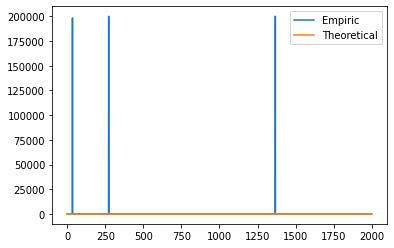

In [79]:
plt.plot(range(len(times_const)), times_const, label='Empiric')
n = np.linspace(1, 2000, 10)
big_o = np.ones(n.shape)

plt.plot(n,big_o, label = 'Theoretical')
plt.legend()
plt.show()

In [14]:
def f2(x):
    return sum(x)

In [15]:
times_sum = measure_times(f2)

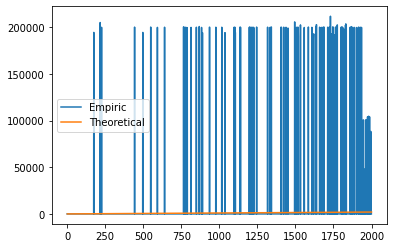

In [83]:
plt.plot(range(len(times_sum)), times_sum, label = 'Empiric')
n = np.linspace(1, 2000, 100)
big_o = n

plt.plot(n,big_o, label = 'Theoretical')
plt.legend()
plt.show()

In [17]:
def f3(x):
    return np.prod(x)

In [18]:
times_prod = measure_times(f3)

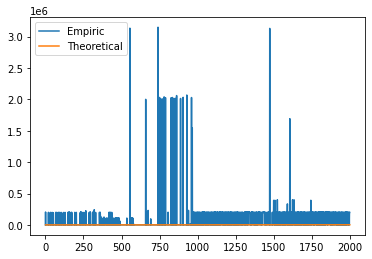

In [84]:
plt.plot(range(len(times_prod)), times_prod, label ='Empiric')
n = np.linspace(1, 2000, 100)
big_o = n

plt.plot(n,big_o, label = 'Theoretical')
plt.legend()
plt.show()

In [68]:
def f4(poly):
    
    n = len(poly)
    x = 1.5
 
    result = 0

    for k in range(len(poly)):
 
        result += x**k * poly[k]
  
    return result  

In [75]:
times_direct = measure_times(f4)

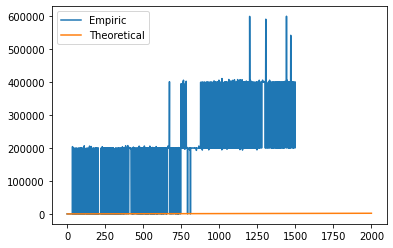

In [85]:
plt.plot(range(len(times_direct)), times_direct, label = "Empiric")
n = np.linspace(1, 2000, 100)
big_o = n

plt.plot(n,big_o, label = 'Theoretical')
plt.legend()
plt.show()

In [61]:
def horner(poly):
    
    n = len(poly)
    x = 1.5
 
    result = poly[-1] 

    for i in range(1, n):
 
        result = result*x + poly[n-i-1]
  
    return result

In [63]:
times_horner = measure_times(horner)

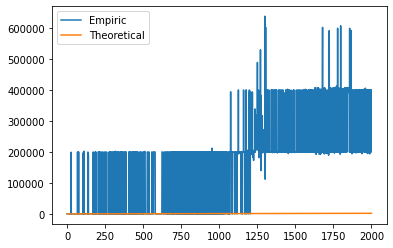

In [86]:
plt.plot(range(len(times_horner)), times_horner, label = 'Empiric')
n = np.linspace(1, 2000, 100)
big_o = n

plt.plot(n,big_o, label = 'Theoretical')
plt.legend()
plt.show()

In [22]:
def f5(x):
    n = len(x)
    a = deepcopy(x)
    for i in range(n-1):
        for j in range(n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
    return a

In [25]:
times_bubble = measure_times(f5)

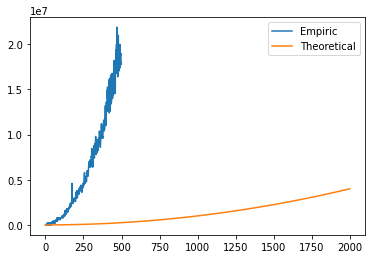

In [87]:
plt.plot(range(len(times_bubble)), times_bubble, label = 'Empiric')
n = np.linspace(1, 2000, 100)
big_o = n**2

plt.plot(n,big_o, label = 'Theoretical')
plt.legend()
plt.show()

In [30]:
def f6(x):
    
    a = deepcopy(x)
    
    less = []
    equal = []
    greater = []

    if len(a) > 1:
        first_el = a[0]
        for i in a:
            if i < first_el:
                less.append(i)
            elif i == first_el:
                equal.append(i)
            else:
                greater.append(x)
        return f6(less)+equal+f6(greater) 
    else:
        return a

In [31]:
times_quick = measure_times(f6)

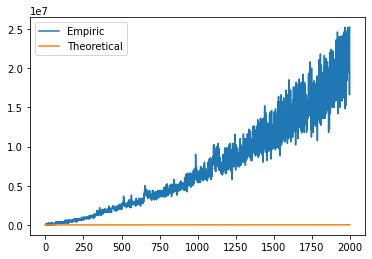

In [89]:
plt.plot(range(len(times_quick)), times_quick, label = 'Empiric')
n = np.linspace(1, 2000, 100)
big_o = n*np.log(n)

plt.plot(n,big_o, label = 'Theoretical')
plt.legend()
plt.show()

In [35]:
def f7(x):
    minrun = 32
    
    arr = deepcopy(x)
    
    def InsSort(arr,start,end):    
        for i in range(start+1,end+1):
            elem = arr[i]
            j = i-1
            while j>=start and elem<arr[j]:
                arr[j+1] = arr[j]
                j -= 1
            arr[j+1] = elem
        return arr
    
    def merge(arr,start,mid,end):
        if mid==end:
            return arr
        first = arr[start:mid+1]
        last = arr[mid+1:end+1]
        len1 = mid-start+1
        len2 = end-mid
        ind1 = 0
        ind2 = 0
        ind  = start

        while ind1<len1 and ind2<len2:
            if first[ind1]<last[ind2]:
                arr[ind] = first[ind1]
                ind1 += 1
            else:
                arr[ind] = last[ind2]
                ind2 += 1
            ind += 1

        while ind1<len1:
            arr[ind] = first[ind1]
            ind1 += 1
            ind += 1

        while ind2<len2:
            arr[ind] = last[ind2]
            ind2 += 1
            ind += 1   

        return arr
    
    
    n = len(arr)
    
    for start in range(0,n,minrun):
        end = min(start+minrun-1,n-1)
        arr = InsSort(arr,start,end)
        
    curr_size = minrun
    while curr_size<n:    
        for start in range(0,n,curr_size*2):
            mid = min(n-1,start+curr_size-1)
            end = min(n-1,mid+curr_size)
            arr = merge(arr,start,mid,end)
        curr_size *= 2
    return arr

In [36]:
times_timsort = measure_times(f7)

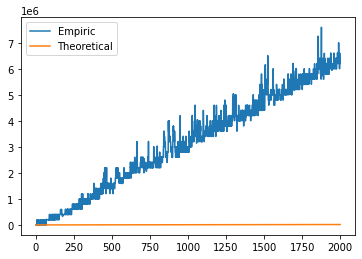

In [90]:
plt.plot(range(len(times_timsort)), times_timsort, label = 'Empiric')
n = np.linspace(1, 2000, 100)
big_o = n*np.log(n)

plt.plot(n,big_o, label = 'Theoretical')
plt.legend()
plt.show()

# Task 2

In [70]:
def prod_matrix(A, B):
    n = len(A)
    C = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            C[i][j] = sum([A[i][k]*B[k][j] for k in range(n)])
    return C

In [71]:
A = [[2,3,4],[4,2,5],[2,2,1]]
B = [[2,3,4],[4,2,5],[2,2,1]]
prod_matrix(A,B)

[[24, 20, 27], [26, 26, 31], [14, 12, 19]]